# Техническое задание

## Модули

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Подготовка датасета

<font size="3">**Грузим датасет и смотрим краткую сводку по нему**</font>

In [2]:
dataframe = pd.read_excel("data.xlsx", header=0) 
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   client_id       724 non-null    float64
 1   sum             724 non-null    float64
 2   status          730 non-null    object 
 3   sale            724 non-null    object 
 4   new/current     724 non-null    object 
 5   Unnamed: 5      0 non-null      float64
 6   document        709 non-null    object 
 7   receiving_date  607 non-null    object 
dtypes: float64(3), object(5)
memory usage: 45.8+ KB


<font size="3">**Посмотрим первые 5 строк**</font>

In [3]:
dataframe.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


<font size="3">**Уберём лишний пустой столбец**</font>

In [4]:
dataframe.drop(labels="Unnamed: 5", axis=1, inplace=True)

<font size="3">**Заменим прочерки на NaN для более удобной обработки**</font>

In [5]:
dataframe.replace(to_replace='-', value=np.nan, inplace=True)
dataframe.head()

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaT
1,6.0,11693.7,ВНУТРЕННИЙ,NaN,NaN,NaN,NaT
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08


<font size="3">**Приведем столбцы к нужному типу данных**</font>

In [6]:
dataframe["client_id"] = dataframe["client_id"].astype("Int64")
dataframe["sum"] = dataframe["sum"].astype("float64")
dataframe[dataframe.columns[2:6]] = dataframe.loc[:,"status":"document"].astype("string")
dataframe["receiving_date"] = pd.to_datetime(dataframe["receiving_date"])
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       724 non-null    Int64         
 1   sum             724 non-null    float64       
 2   status          730 non-null    string        
 3   sale            723 non-null    string        
 4   new/current     723 non-null    string        
 5   document        708 non-null    string        
 6   receiving_date  606 non-null    datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), float64(1), string(4)
memory usage: 40.8 KB


<font size="3">**В некоторых строках, там где есть дата получение оригинала, отсутствует поле "document". Исправим это:**</font>

In [7]:
#dataframe.loc[dataframe["receiving_date"] is np.nan, "document"] = "оригинал"
dataframe.loc[dataframe["receiving_date"].notna(), "document"] = "оригинал"

<font size="3">**Посмотрим подробнее на колонку "status"**</font>

In [8]:
#pd.unique(dataframe["status"])
dataframe["status"].value_counts()

ОПЛАЧЕНО         622
ПРОСРОЧЕНО        52
В РАБОТЕ          44
НА ПОДПИСАНИИ      5
Май 2021           1
ВНУТРЕННИЙ         1
Июнь 2021          1
Июль 2021          1
Август 2021        1
Сентябрь 2021      1
Октябрь 2021       1
Name: status, dtype: Int64

<font size="3">**Каждый месяц отделяется строкой, все поля которой пустые, кроме поля "status". Найдём индексы таких строк, разделим датасет на месячные части и поместим в словарь**</font>

In [9]:
may_index = dataframe.index[dataframe['status'] == 'Май 2021'].to_list()[0]
june_index =  dataframe.index[dataframe['status'] == 'Июнь 2021'].to_list()[0]
july_index = dataframe.index[dataframe['status'] == 'Июль 2021'].to_list()[0]
august_index = dataframe.index[dataframe['status'] == 'Август 2021'].to_list()[0]
september_index = dataframe.index[dataframe['status'] == 'Сентябрь 2021'].to_list()[0]
october_index = dataframe.index[dataframe['status'] == 'Октябрь 2021'].to_list()[0]

In [10]:
data_dict = {
    "may": dataframe[may_index + 1: june_index],
    "june": dataframe[june_index + 1: july_index],
    "july": dataframe[july_index + 1: august_index],
    "august": dataframe[august_index + 1: september_index],
    "september": dataframe[september_index + 1: october_index],
    "october": dataframe[october_index + 1:]
}

<font size="3">**Теперь всё готово для работы с данными**</font>

## Вопросы

<font size="4">**1. Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных 
средств которых не просрочен**</font>.

In [11]:
df_july = data_dict["july"]
july_sum = df_july[df_july["status"] != "ПРОСРОЧЕНО"]["sum"].sum()
print("Выручка за июль 2021, без учёта просроченных сделок:", int(july_sum.round()))

Выручка за июль 2021, без учёта просроченных сделок: 859896


<font size="4">**2. Как изменялась выручка компании за рассматриваемый период? 
Проиллюстрируйте графиком**</font>.

In [12]:
months = ["may", "june", "july", "august", "september", "october"]

income = []
for month in months:
    income.append(data_dict[month]["sum"].sum())

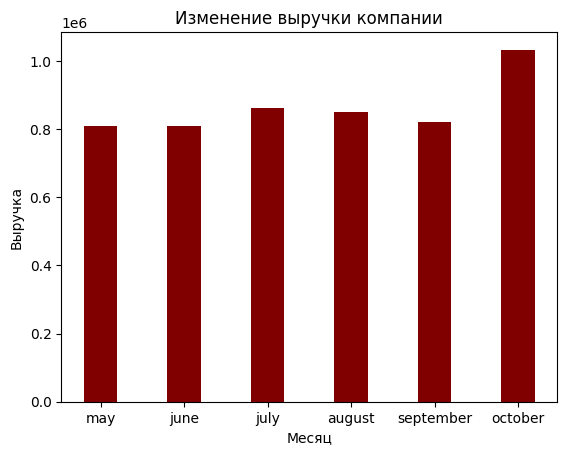

In [13]:
plt.bar(months, income, color ='maroon', width = 0.4)
plt.xlabel("Месяц")
plt.ylabel("Выручка")
plt.title("Изменение выручки компании")
plt.show()

<font size="4">**3. Кто из менеджеров привлек для компании больше всего денежных средств в 
сентябре 2021**</font>?

In [14]:
data_dict["september"].groupby(by="sale")["sum"].sum().sort_values(ascending=False)
#Алтернативный способ использовать метод idxmax()

sale
Смирнов       221525.70
Петрова       149344.46
Андреев       133652.50
Иванов         94770.60
Кузнецова      72228.40
Филимонова     59514.47
Васильев       49895.45
Соколов        35183.50
Михайлов        4268.70
Name: sum, dtype: float64

<font size="3">**Смирнов привлек для компании больше всего денежных средств.**</font>

<font size="4">**4. Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?**</font>

In [15]:
data_dict["october"].groupby(by="new/current")["client_id"].count()


new/current
новая      36
текущая    99
Name: client_id, dtype: int64

<font size="3">**За октябрь 2021 преобладали текущие сделки.**</font>

<font size="4">**5. Сколько оригиналов договора по майским сделкам было получено в июне 2021?**</font>

In [16]:
may_count = data_dict["may"][(data_dict["may"]["document"]=="оригинал") \
& (data_dict["may"]["receiving_date"] >= pd.Timestamp('2021-06-01T00')) \
& (data_dict["may"]["receiving_date"] < pd.Timestamp('2021-07-01T00'))]["client_id"].count()
print(f"Было получено {may_count} оригиналов")

Было получено 77 оригиналов


## Задание

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.
1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом 
есяце).
Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. Вычислите остаток каждого из менеджеров на 01.07.2021.

In [17]:
may_june_df = pd.concat([data_dict["may"], data_dict["june"]])

cond1 = (may_june_df["status"] == "ОПЛАЧЕНО") & (may_june_df["new/current"] == "новая")
may_june_df["bonus"] = may_june_df[cond1]["sum"].apply(lambda x: 0.07 * x)

In [18]:
cond2a = (may_june_df["status"] != "ПРОСРОЧЕНО") & (may_june_df["new/current"] == "текущая") & (may_june_df["sum"] > 10000)
may_june_df.loc[cond2a, "bonus"] = may_june_df[cond2a]["sum"].apply(lambda x: 0.05 * x)

cond2b = (may_june_df["status"] != "ПРОСРОЧЕНО") & (may_june_df["new/current"] == "текущая") & (may_june_df["sum"] <=10000)
may_june_df.loc[cond2b, "bonus"] = may_june_df[cond2b]["sum"].apply(lambda x: 0.03 * x)

In [19]:
may_june_df[may_june_df["receiving_date"] < pd.Timestamp('2021-07-01T00')].groupby(by="sale")["bonus"].sum()

sale
Андреев       4798.2037
Васильев       339.2310
Иванов        2503.8390
Кузнецова     2604.6716
Петрова       7028.8020
Селиванов      353.3220
Смирнов       4775.1330
Филимонова     409.6830
Name: bonus, dtype: float64